# 붓꽃(iris)분류기 클러스터링을 통해 만들기

- Iris 데이터셋은 3종류의 붓꽃(Setosa, Versicolour, Virginica)을 4가지 특성(꽃받침 길이와 너비, 꽃잎 길이와 너비)을 사용하여 분류하는 문제입니다.

- ` 4가지 특성(feature)들을 이용`하여 붓꽃 품종을 클러스터링해봅니다.모델 구축부터 훈련 및 평가까지 진행하여 `분류 정확도를 90% 이상`으로 만듭니다.

### 1. 라이브러리 임포트

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### 2. 데이터셋 로드 및 전처리

In [2]:
# Iris 데이터셋 로드
iris = load_iris()
data,target = iris.data , iris.target
feature_names = iris.feature_names

In [3]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# df 형태로 데이터셋 변환
df = pd.DataFrame()
df['species'] = target
df

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


데이터를 정규화하기 위해 StandardScaler를 사용하여 특성 데이터의 스케일을 조정하고, <br> 훈련(train) 데이터와 검증(test) 데이터를 80:20의 비율로 분리합니다.

In [5]:
# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test= train_test_split(X_scaled, target, test_size=0.2, random_state=42)

### 3.모델 로드 및 학습하기

In [6]:
# Step 3: 엘보우 기법으로 최적의 클러스터 수 찾기
sse = []  # 가장 가까운 클러스터 중심까지의 제곱 거리의 합계 (Sum of sqared distance to the closest cluster center)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)

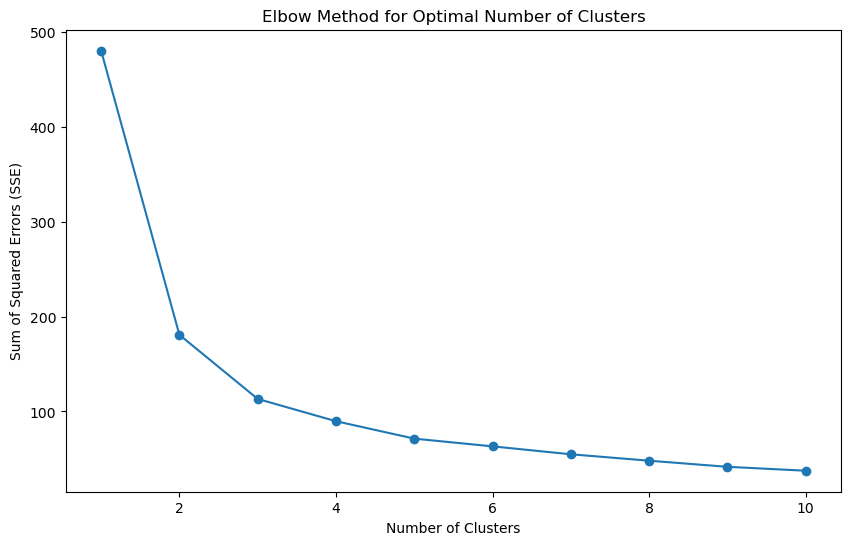

In [7]:
# 팔꿈치 부분 시각화해보기
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [8]:
optimal_clusters = 3  # Based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters,
                random_state=42,n_init=10)

cluster_labels = kmeans.fit_predict(X_scaled)

### 4.결과 분석하기

In [9]:
df['cluster'] = cluster_labels

In [10]:
df['cluster']

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    2
147    0
148    0
149    2
Name: cluster, Length: 150, dtype: int32

In [11]:
# Compare the clusters with the actual species
ct = pd.crosstab(df['species'], df['cluster'], rownames=['Actual Species'], colnames=['Cluster Labels'])
print(ct)

Cluster Labels   0   1   2
Actual Species            
0                0  50   0
1               11   0  39
2               36   0  14


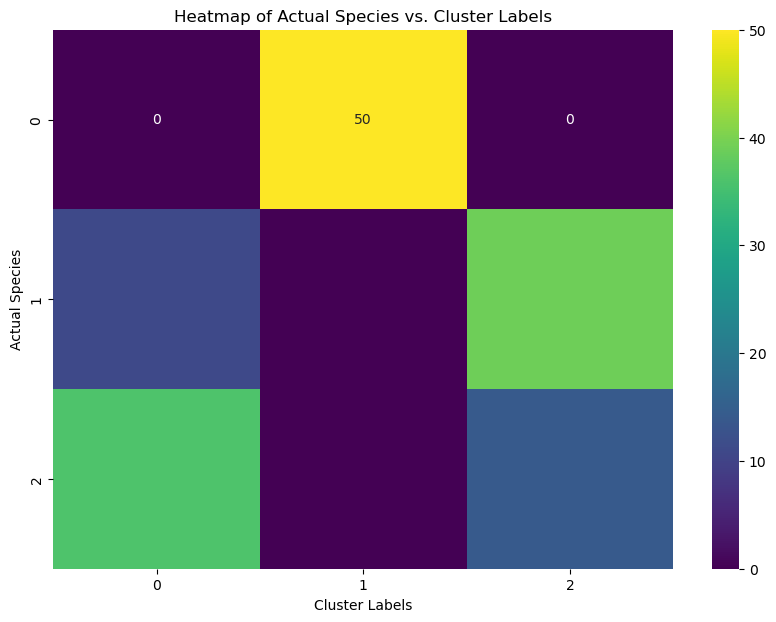

In [12]:
plt.figure(figsize=(10, 7))
sns.heatmap(ct, annot=True, fmt='d', cmap='viridis')
plt.title('Heatmap of Actual Species vs. Cluster Labels')
plt.xlabel('Cluster Labels')
plt.ylabel('Actual Species')
plt.show()

In [13]:
# 현재 클러스터 레이블을 변경하는 매핑을 정의합니다.
# 기존 클러스터 레이블: 0, 1, 2
# 새로운 클러스터 레이블: 2, 0, 1
label_mapping = {
    0: 2,
    1: 0,
    2: 1
}
df['cluster'] = df['cluster'].map(label_mapping)
df['cluster']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    1
147    2
148    2
149    1
Name: cluster, Length: 150, dtype: int64

In [14]:
# 새로운 클러스터 레이블을 사용하여 교차표(ct)를 생성합니다.
ct = pd.crosstab(df['species'], df['cluster'], rownames=['Actual Species'], colnames=['Cluster Labels'])
print(ct)

Cluster Labels   0   1   2
Actual Species            
0               50   0   0
1                0  39  11
2                0  14  36


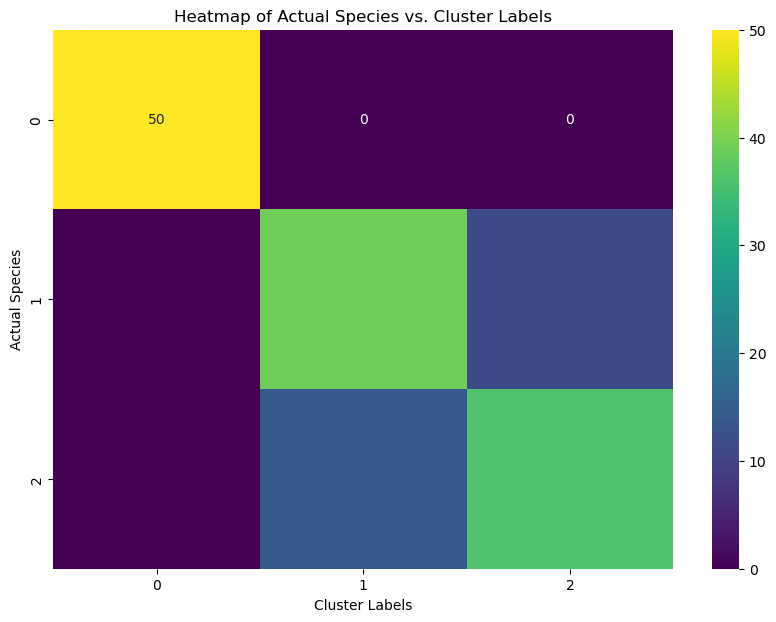

In [15]:
plt.figure(figsize=(10, 7))
sns.heatmap(ct, annot=True, fmt='d', cmap='viridis')
plt.title('Heatmap of Actual Species vs. Cluster Labels')
plt.xlabel('Cluster Labels')
plt.ylabel('Actual Species')
plt.show()

In [16]:
# 정확도 계산하기
mapped_clusters = df['cluster']

# 분류와 똑같은 지표로 계산하기
print("Classification Report:\n", classification_report(df['species'], mapped_clusters))
print("Accuracy Score:", accuracy_score(df['species'], mapped_clusters))
print("Confusion Matrix:\n", confusion_matrix(df['species'], mapped_clusters))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150

Accuracy Score: 0.8333333333333334
Confusion Matrix:
 [[50  0  0]
 [ 0 39 11]
 [ 0 14 36]]


In [17]:
df.columns

Index(['species', 'cluster'], dtype='object')

In [18]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
df

,species,cluster
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,2,2
146,2,1
147,2,2
148,2,2


In [19]:
# 클러스터링 시각화
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df[feature_names[0]], y=df[feature_names[1]], hue=df['cluster'], palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('K-Means Clustering of Iris Dataset')
plt.legend()
plt.show()

KeyError: 'sepal length (cm)'

<Figure size 1200x800 with 0 Axes>